# Implementing Q learning with the Taxi gym environment

gym is an open source interface to reinforcement learning tasks.
The gym library provides an easy-to-use suite of reinforcement learning tasks.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import gym
import random

## Create the environment

In [ ]:
env = gym.make("Taxi-v3")
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



Description:
This task was introduced in [Dietterich2000] to illustrate some issues in hierarchical reinforcement learning. 
There are 4 locations (labeled by different letters) and your job is to pick up the passenger at one location and 
drop him off in another. You receive +20 points for a successful dropoff, and lose 1 point for every timestep it takes.
There is also a 10 point penalty for illegal pick-up and drop-off actions.

Observations: 
There are 500 discrete states since there are 25 taxi positions, 5 possible locations of the passenger (including the case when the passenger is the taxi), and 4 destination locations. 
    
Actions: 
There are 6 discrete deterministic actions:
    - 0: move south
    - 1: move north
    - 2: move east 
    - 3: move west 
    - 4: pickup passenger
    - 5: dropoff passenger
    
Rewards: 
There is a reward of -1 for each action and an additional reward of +20 for delievering the passenger. There is a reward of -10 for executing actions "pickup" and "dropoff" illegally.
    
Rendering:
    - blue: passenger
    - magenta: destination
    - yellow: empty taxi
    - green: full taxi
    - other letters (R, G, B and Y): locations for passengers and destinations
    
actions:
    - 0: south
    - 1: north
    - 2: east
    - 3: west
    - 4: pickup
    - 5: dropoff

The state space is represented by: (taxi_row, taxi_col, passenger_location, destination)

In [ ]:
action_size = env.action_space.n
state_size = env.observation_space.n
print("Action space size: ", action_size)
print("State space size: ", state_size)

Action space size:  6
State space size:  500


The taxi environment has a finite number of actions and states, which makes it suitable for Q learning algorithm.

## Initialise the Q table

In [ ]:
Q = np.zeros((state_size, action_size))

## Define the hyperparameters

In [ ]:
train_episodes = 2000         # Total train episodes
test_episodes = 100           # Total test episodes
max_steps = 100               # Max steps per episode
alpha = 0.7                   # Learning rate
gamma = 0.618                 # Discounting rate

epsilon = 1                   # Exploration rate
max_epsilon = 1               # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.01             # Exponential decay rate for exploration prob

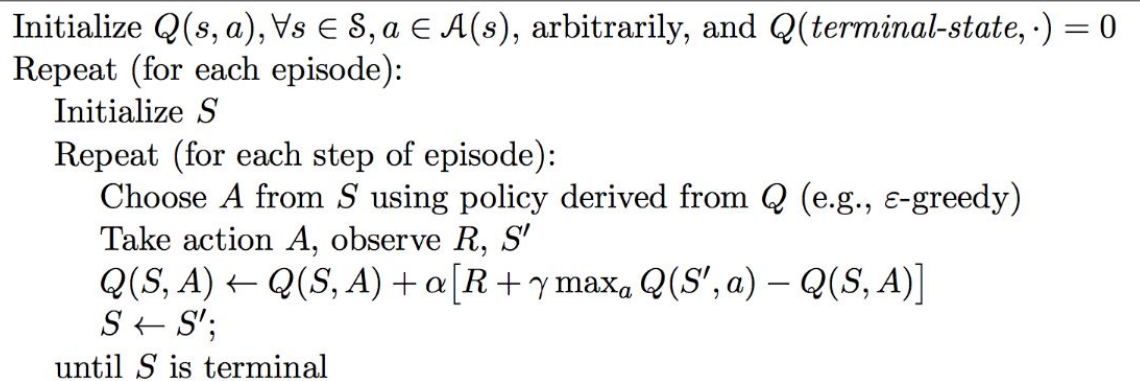

## Training phase

In [ ]:
for episode in range(train_episodes):
      # Reset the environment
      state = env.reset()
    
      for step in range(max_steps):
        # Choose an action (a) among the possible states (s)
        exp_exp_tradeoff = random.uniform(0, 1)

        
        # If this number > epsilon, select the action corresponding to the biggest Q value for this state (Exploitation)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(Q[state, :])
        # Else choose a random action (Exploration)
        else:
          action = env.action_space.sample()
        
        # Perform the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update the Q table using the Bellman equation: Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])
    
        # Update the state
        state = new_state
        
        # If we reach the end of the episode
        if done == True:
          break
    
    # Reduce epsilon (because we need less and less exploration)
      epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)

  

## Test phase

In [ ]:
for episode in range(test_episodes):
  state = env.reset()
       
  for set in range(max_steps):
    env.render()
    # Take the action (index) that have the maximum expected future reward given that state
    action = np.argmax(Q[state, :])
    new_state, reward, done, info = env.step(action)
    state = new_state
    if done == True:
      break

env.close()

Streaming output truncated to the last 5000 lines.
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
